In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.backend as K

import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.size":20
})

In [2]:
# Load the database

dataset = np.load('database.npz')
N = dataset['input_data'].shape[0]
nparams = dataset['input_data'].shape[1]
centers = dataset['centers']

idx = np.load('idx.npy')

X_centers = dataset['input_data'][centers]
Y_centers = dataset['output_data'][centers]

train_end_idx = int(N*0.7)
val_end_idx = int(N*0.8)

X_test = dataset["input_data"][idx][val_end_idx:]
Y_test = dataset["output_data"][idx][val_end_idx:]

In [3]:
# Load the model
model_path = 'model'
model = tf.keras.models.load_model(model_path)

#Load the model training history
hist_path = 'history.npz'
history = np.load(hist_path)

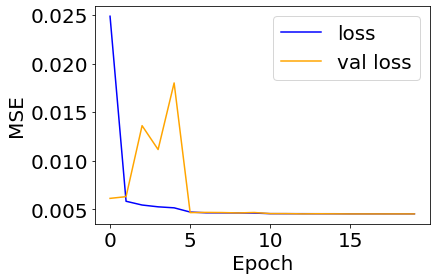

In [9]:
# Plot history
nepochs = len(history['lr'])
epochs = np.arange(nepochs)
plt.plot(epochs, history['loss'], c = 'b', label = 'loss')
plt.plot(epochs, history['val_loss'], c = 'orange', label = 'val loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.savefig("training.pdf", bbox_inches="tight")
plt.show()

In [10]:
Y_pred_centers = model.predict(X_centers)
Y_pred_test = model.predict(X_test)

In [11]:
momentum = dataset['momentum_GeV']

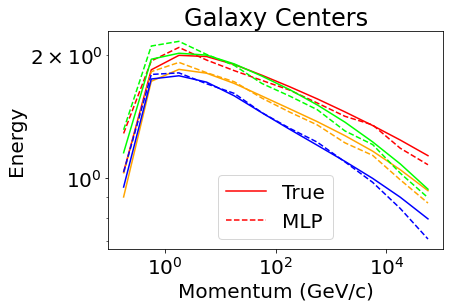

In [25]:
fig, ax = plt.subplots()
cs = ['r', 'orange', 'lime', 'b']
for i in range(len(centers)):
    if i == 0:
        ax.loglog(momentum, Y_centers[i], ls = '-', c = cs[i], label = "True")
        ax.loglog(momentum, Y_pred_centers[i], ls = '--', c = cs[i], label = "MLP")
    else:
        ax.loglog(momentum, Y_centers[i], ls = '-', c = cs[i])
        ax.loglog(momentum, Y_pred_centers[i], ls = '--', c = cs[i])
plt.xlabel('Momentum (GeV/c)')
plt.ylabel('Energy')
plt.legend()
plt.title('Galaxy Centers')
fig.savefig("test.pdf", bbox_inches="tight")
plt.show()

In [16]:
idxs

array([ 88101, 494096, 585978, 280868, 618528, 112530, 385420, 442114,
       310706, 378936])

In [17]:
Y_pred_test.shape[0]

705109

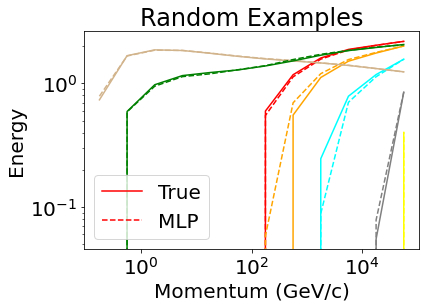

In [28]:
fig, ax = plt.subplots()
ics = np.arange(Y_pred_test.shape[0])
np.random.shuffle(ics)
n = 10
idxs = ics[:n]
cs = ['r', 'orange', 'lime', 'b', 'magenta', 'grey', 'cyan',
      'yellow', 'tan', 'green', 'teal']
for j,i in enumerate(idxs):
    if j == 0:
        ax.loglog(momentum, Y_test[i], ls = '-', c = cs[j], label = "True")
        ax.loglog(momentum, Y_pred_test[i], ls = '--', c = cs[j], label = "MLP")
    else:
        ax.loglog(momentum, Y_test[i], ls = '-', c = cs[j])
        ax.loglog(momentum, Y_pred_test[i], ls = '--', c = cs[j])
plt.xlabel('Momentum (GeV/c)')
plt.ylabel('Energy')
plt.legend()
plt.title('Random Examples')
fig.savefig("test2.pdf", bbox_inches="tight")
plt.show()